In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
%matplotlib inline

## Problema proposto

Vamos simular a operação de um biorreator ideal do tipo semi batelada que processa a reação seguinte:

$$
A \longrightarrow P
$$

Vamos considerar:
- reação isotérmica (temperatura constante)
- mistura é ideal
- alimentação não possue biomassa
- a densidade da alimentação e saída possuem densidade constante e iguais
- vazão de alimentação é igual a vazão de saída
- o meio de cultura só possui um único tipo de biomassa crescendo com um único substrato
-reação de 1a ordem

Modelo:
Balanço de massa
$$
{\frac{d(pV)}{dt}} = Fp - Fp = 0
$$
para uma biorreator:

- Taxa de biomassa entrando do reator = Fxf
- Taxa de biomassa saindo do reator = Fx
- Taxa de geração de biomassa
- acumulo de biomassa no reator = d(Vx)/dt

$$
{\frac{d(Vx)}{dt}} = Fx_f - Fx + Vr_1
$$

sendo r1 a taxa de geração de células
 Dividindo os dois lados por V:
$$
{\frac{d(x)}{dt}} = {\frac{F}{V}}x_f - {\frac{F}{V}}x + r_1
$$
a razão F/V pode ser descrita como tempo espacial do reator D. No entanto, no ramo da engenharia bioquímica, F/V é referido como taxa de diluiçao, provavelmente relacionado a diluição da biomassa no biorreator. Ficando assim:

$$
{\frac{d(x)}{dt}} = D(x_f - x) + r_1
$$

Para o balanço de massa do substrato, faz-se com a taxa de consumo do substrato e manipulando tem-se:

$$
{\frac{d(S)}{dt}} = D(S_f - S) - r_2
$$

A taxa de 1a ordem fica da forma para reação do produto A

$$
r = k\cdot C_A
$$



Sabe-se que a taxa de crescimento de bactérias depende do meio que elas estão. Assim, estipula-se que a taxa de crescimento é função da concentração de subtrato no meio de cultura. Sendo o rendimento do produto P em relação ao reagente A:

$$
r_1 = \mu x
$$
Com rendimento constante:
$$
Y = {\frac{r_1}{r_2}} = {\frac{massa\ de\ células\ formadas}{massa\ de\ substrato\ consumido}}
$$

assim a relação entre taxas é:

$$
r_2 = {\frac{r_1}{Y}}
$$
Substituindo no balanço de massa:

$$
{\frac{d(x)}{dt}} = D(x_f - x) + \mu x
$$

$$
{\frac{d(S)}{dt}} = D(S_f - S) - {\frac{d(\mu x)}{dY}}
$$

Para esse caso em que a alimentação não contem biomassa (xf = 0):

$$
{\frac{d(x)}{dt}} = (\mu  - D)x
$$

$$
{\frac{d(S)}{dt}} = D(S_f - S) - {\frac{(\mu x)}{Y}}
$$

 Como a crescimento específico (u) não é constante e varia com a concentração de substrato, é necessário escolher um modelo para estimar essa correlação. O modelo escolhido para esse trabalho é o de Monod

$$
\mu = {\frac{\mu _mS}{K_m+S}}
$$

sendo \mu_m o crescimento específico máximo e K_m a concentração de substrato limitante quando o crescimento específico é igual a metade do cresciemnto específico máximo. Ambos são parâmetros obtidos experimentalmente e não tem interpretação física direta.  

No entanto o proposto pelo livro é o uso de um reator tipo semi batelada em que etanol é produzido a partir da Saccharomyces cerevisiae com glicose como substrato:

In [26]:
#reator batelada
um = 0.53 #h^-1
Km = 0.12 # g/l
D = 0.3 #h^-1
Sf = 4.0 #g/l
Y = 0.4


In [27]:
#definindo mu em funça~ode outras variaveis
def mu1 (S):
  return um*S/(Km+S)


In [39]:
#definindo as EDOs
def bat(x,t):
  X,S,P = x
  dX = X*(mu1(S)-D)
  dS = D*(Sf-S)-(mu1(S)*X/Y)
  dP = -dS
  return [dX,dS,dP]



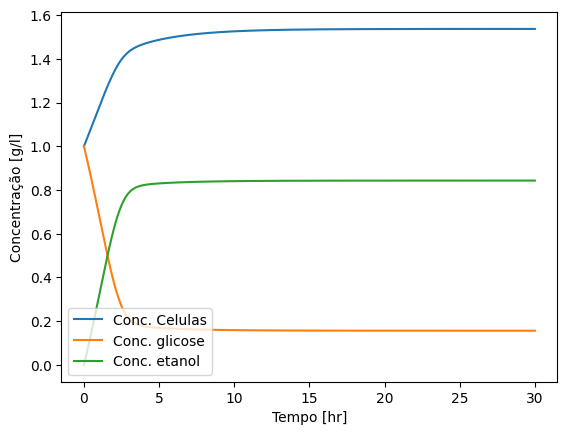

In [43]:
IC1 = [1, 1.0, 0]

t = np.linspace(0,30, 6000)
sol = odeint(bat,IC1,t)
X,S,P = sol.transpose()

plt.plot(t,X)
plt.plot(t,S)
plt.plot(t,P)


plt.xlabel('Tempo [hr]')
plt.ylabel('Concentração [g/l]')
plt.legend(['Conc. Celulas',
            'Conc. glicose',
            'Conc. etanol'])

Observa-se que a reação estabiliza muito rápido em um reator batelada. Dessa forma, o livro sugere que seja em pregado um reator semi-batelada para aumentar a eficiência do processo.

Pra um reator de semi-batelada tem-se a adição de reagente em um reator batelada ao longo do processo em que o volume da solução aumenta ocm o tempo.

$$
{\frac{d(V)}{dt}} = F
$$

Para função do rendimento:

$$
{\frac{d(x)}{dt}} = \mu x - {\frac{F}{V}}x
$$
E para o substrato S:

$$
{\frac{d(S)}{dt}} = -\sigma x - {\frac{F}{V}}(Sf-S)
$$

E produto P

$$
{\frac{d(P)}{dt}} =\pi x - {\frac{F}{V}}P
$$

Essas equações tem dois novos termos: taxa de consumo de substrato \sigma e taxa de formação de produto \pi

$$
\mu = {\frac{0.408S}{0.22 + S}}e^-0.028P
$$

$$
\sigma = {\frac{\mu}{0.1}}
$$

$$
\pi = {\frac{S}{0.44 + S}}e^-0.015P
$$

In [4]:
from re import finditer
#Condições iniciais
x0 = 0.2 #concentração inicial de biomassa (g/l)
S0 = 100 #concentração inicial de glicose (g/l)
P0 = 0 #concentração inicial de etanol (g/l)
V0 = 1 #Volume inicial (l)
tf = 20 # tempo de integração (h^-1)
finditer = 1 #(h^-1)
intt = 0.004 #(h)

In [20]:
#entrada de volume
def F(t):
  return 1
#Taxas de reação
def mu (S,P):
  return 0.408*S*math.exp(-0.028*P)/(0.22+S)
def Rs(S,P):
  return mu(S,P)/0.1
def Rp(S,P):
  return  S*math.exp(-0.015*P)/(0.44+S)



In [21]:
#definindo o sistema de equações
def EDO(x,t):
  X,P,S,V = x
  dX = mu(S,P)*X - F(t)*X/V
  dP = -F(t)*P/V + Rp(S,P)
  dS = F(t)*(S0-S)/V - Rs(S,P)*X
  dV = F(t)
  return [dX,dP,dS,dV]

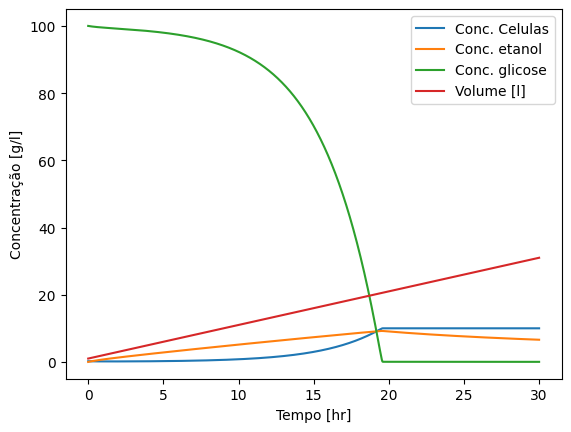

In [25]:
IC = [x0, P0, S0, V0]

t = np.linspace(0,30, 7500)
sol = odeint(EDO,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Tempo [hr]')
plt.ylabel('Concentração [g/l]')
plt.legend(['Conc. Celulas',
            'Conc. etanol',
            'Conc. glicose',
            'Volume [l]'])

Observa-se que após 20h de reação a quantidade de glicose é próxima à zero, assim a taxa de reação cai para próximo de zero também, sinalizando a finalização da reação.
Comparando com os resultados do livro, os valores de saturação estão condizendo com os gráficos apresentados pelo livro.